# Random Forest


In [4]:
#Librerias Necesarias
#Librerias para data processing
import pandas as pd
import numpy as np

#Librrerias para modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Librerias para graficas y visualizacion
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [7]:
df = pd.read_csv("creditcard.csv")

In [8]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [10]:
df.shape


(284807, 31)

In [11]:
df['Class'].value_counts(sort=True)

Class
0    284315
1       492
Name: count, dtype: int64

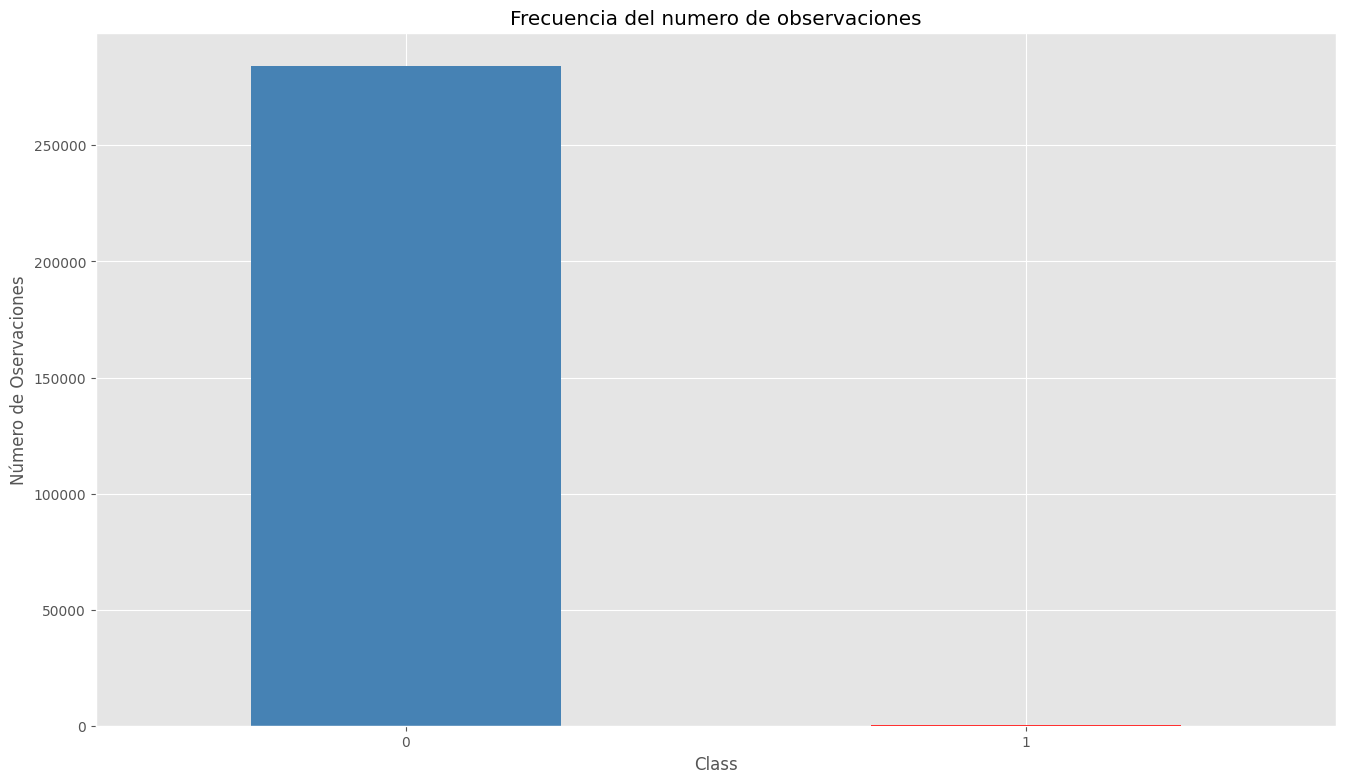

In [13]:
count_classes = df['Class'].value_counts(sort=True)
colors = ['steelblue','red']
count_classes.plot(kind='bar', rot =0, color = colors)
LABELS = count_classes.index.tolist()
plt.xticks(range(len(LABELS)), LABELS)
plt.title('Frecuencia del numero de observaciones')
plt.xlabel('Class')
plt.ylabel('Número de Oservaciones')
plt.show()

In [14]:
normal_df = df [df.Class == 0]
fraud_df = df [df.Class == 1]


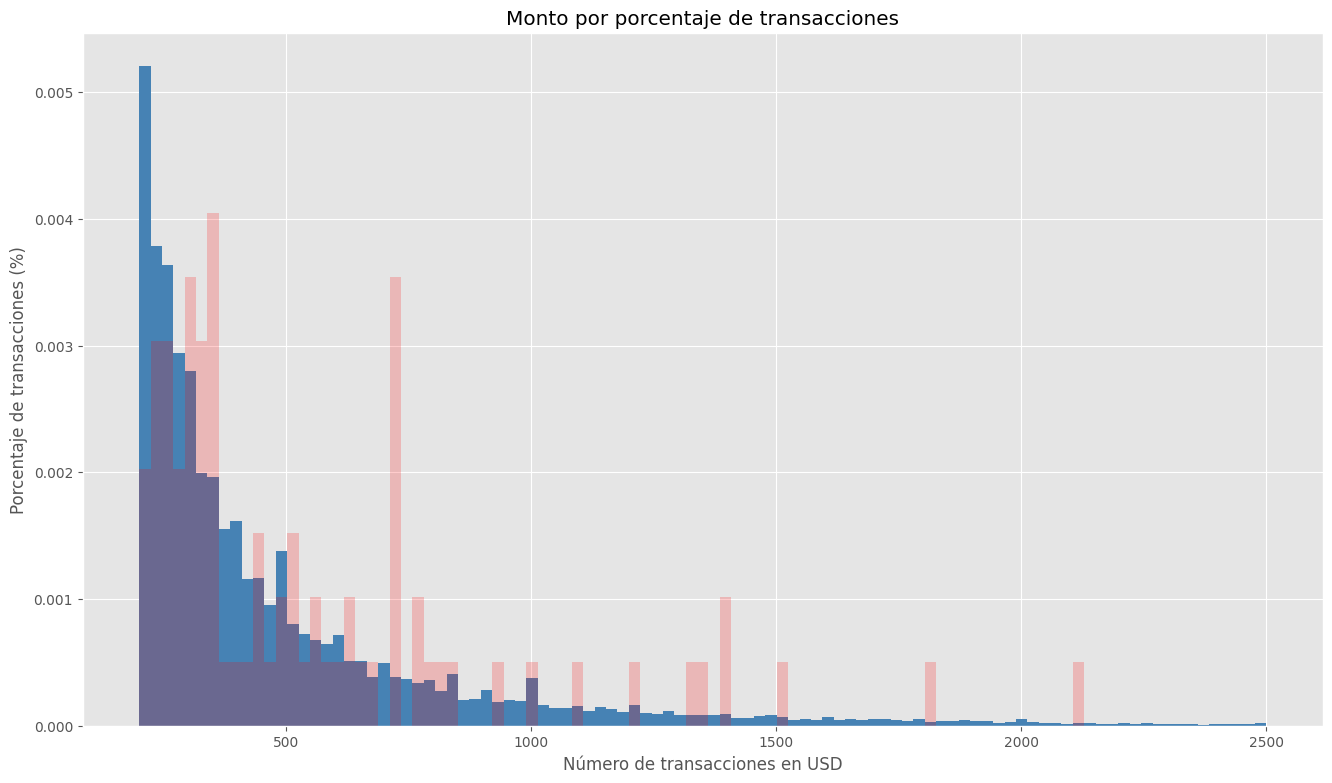

In [20]:
bins = np.linspace(200,2500,100)
plt.hist(normal_df['Amount'], bins,alpha =1, color ='steelblue', density=True, label = 'Normal')
plt.hist(fraud_df['Amount'], bins,alpha =0.2, color ='red', density=True, label = 'Fraud')
plt.xlabel('Número de transacciones en USD')
plt.ylabel('Porcentaje de transacciones (%)')
plt.title('Monto por porcentaje de transacciones')
plt.show()


# Division de datos en trainand test

In [22]:
y = df['Class']
x = df.drop('Class', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

## Creacion del modelo

### Creación de hiperparametros
* n-estimetors: es la cantidad de arbol que generremos
* max_features : la manera de seleccionar la cantidad maxima de features para cada arbol
* min_sample_leaf : numero minimo de elementos en las hojas para permitir un nuevo split del nodo
* cob_score: es un metodo que emula el cross_validation en arboles y permite mejorar la precision y evitar el overfitting
bootstrap: para utilizar diversos tamñaos de muestras para entrenar. Si se pone el falso utilizara el dataset completo
n_jobs: si tenemos multiples cores en la pc podeos indicar cuantos utilizar para aclerar el entrenamiento

### Codigo para determinar el numero de cores


In [26]:
# %pip install psutil


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import psutil
#  numero de nucleos logicos
logical_cores = psutil.cpu_count()
# Numero de nucleos fisicos
fisical_cores = psutil.cpu_count(logical=False)
print(logical_cores)
print(fisical_cores)

12
6


## Creando el modelo con 100 arboles y todos los core disponibles


In [29]:
n_cores = -1
modelRF = RandomForestClassifier(n_estimators=100)
bootstrap = True
verbose = 2
max_features = 'sqrt'
n_jobs = n_cores

In [30]:
modelRF.fit(x_train,y_train)

RandomForestClassifier()

## Evaluando el modelo

In [32]:
# Hacer predicciones
y_pred = modelRF.predict(x_test)

In [33]:
# Métricas de ealuación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print (accuracy)
print (precision)
print (recall)
print (f1)

0.9995259997893332
0.9420289855072463
0.7386363636363636
0.8280254777070064


In [34]:
# Reporte de clasificacion
print ("Reporte de clasificación")
print (classification_report(y_test,y_pred))

Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.94      0.74      0.83        88

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



AttributeError: QuadMesh.set() got an unexpected keyword argument 'fnt'

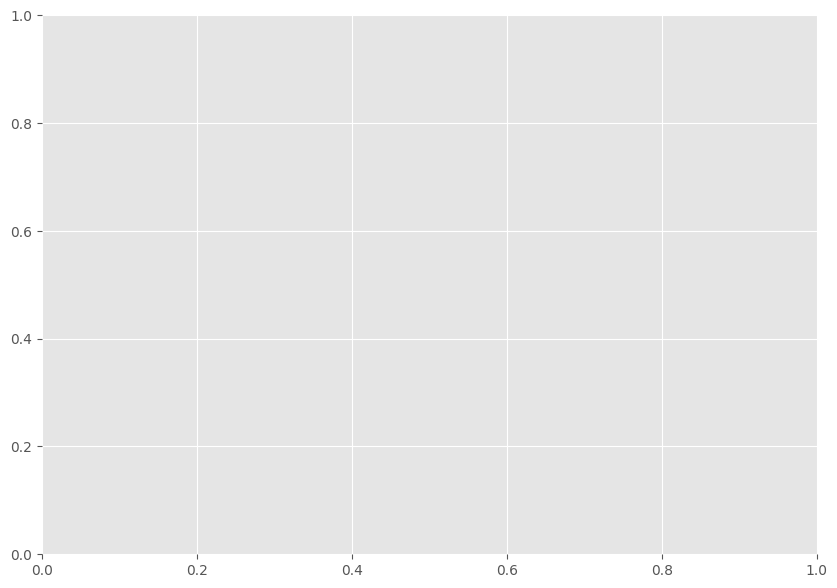

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sb.heatmap(conf_matrix, annot=True, fnt ='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matris de confusion')
plt.show()

## Importancia de las features

AttributeError: Text.set() got an unexpected keyword argument 'align'

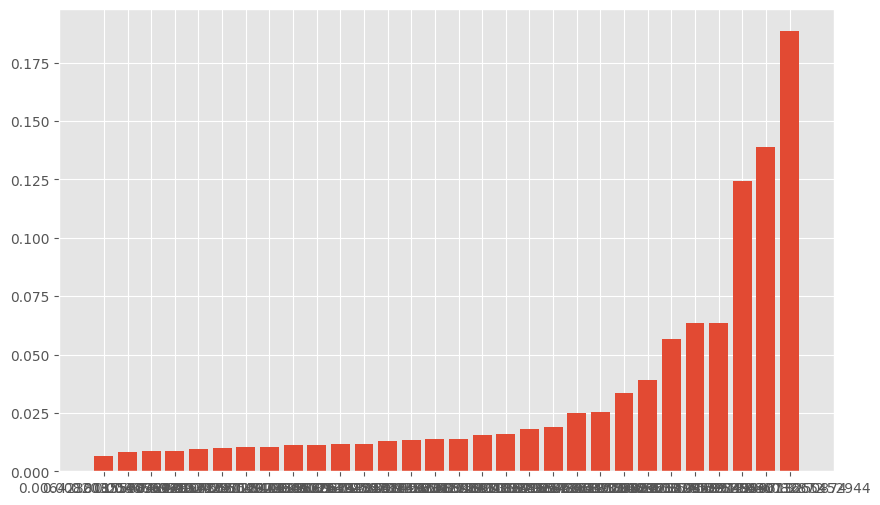

In [40]:
importacia = modelRF.feature_importances_
features_names = x.columns
# Ordenar las caracteristicas por importancia
sorted_indices = importacia.argsort()
plt.figure(figsize=(10,6))
plt.bar(range(len(importacia)), importacia[sorted_indices],align='center')
plt.xticks(range(len(importacia)), importacia[sorted_indices],align='center')

TAREA
tENEMOS EL REPORTE DE CLASIFICACION RF
cREAR EL MODEO
CCREAR UN MODELO LOGISTICO REGRESION OBTENER SU REPORTE DE CLASIFICACION DEL

ANALISIS COMPARATIVO RANDOM FOREST LOGISTIC 